In [1]:
# Example fitting a standard attenuator out (A0) RHESSI flare (microflare)
# But just one of the individual detectors....
# ....generated from get_mfstats9_a0_org_sep.pro

# 28-Nov IGH

In [2]:
from astropy.time import Time, TimeDelta
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sunpy.io.special import read_genx
# Note this load in is a WIP during the refactor/rename
from sunkit_spex.sunxspex_fitting.fitter import Fitter
# Old way which might not work now.....
# from sunxspex.sunxspex_fitting.fitter import SunXspex

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 


In [3]:
plt.rcParams.update({'font.size': 18,'font.family':"sans-serif",\
                         'font.sans-serif':"Arial",'mathtext.default':"regular"})

In [4]:
# Return a string with a trailing 0 if <10
def ldz_int(num):
    if num<10:
        return f'0{int(num):d}'
    if num >=10:
        return f'{int(num):d}'
# Convert astropy time into break_time sswidl format used for the filenames
def break_time(time):
    t=time.ymdhms
    stime=f'{t.year:d}'+ldz_int(t.month)+ldz_int(t.day)+'_'+\
        ldz_int(t.hour)+ldz_int(t.minute)+ldz_int(t.second)
    return stime

In [5]:
# Use the genx file info for the times and the filename
res=read_genx('wee_fig9.genx')
nf=len(res["SAVEGEN0"])
ftims=[]
btims=[]
fname=[]

for f in range(nf):
    ftims.append(Time(res["SAVEGEN0"][f]["FPEAK_TR"],format='isot'))
    btims.append(Time(res["SAVEGEN0"][f]["BK_BF_TR"],format='isot'))
    # spec and srm fits are bk_bf_tr[0]-4s    
    # tt=Time(res["SAVEGEN0"][f]["BK_BF_TR"],format='isot')[0]-TimeDelta(16,format='sec')
    tt=Time(res["SAVEGEN0"][f]["FPEAK"],format='isot')

    fname.append(break_time(tt))

for f in range(nf):
    print(f'Flare: {f+1}')
    print('Peak Time Range: ',ftims[f].iso)
    print('Back Time Range: ',btims[f].iso)
    print('Filename : ',fname[f])
    


Flare: 1
Peak Time Range:  ['2003-02-27 06:22:26.000' '2003-02-27 06:22:42.000']
Back Time Range:  ['2003-02-27 06:21:06.000' '2003-02-27 06:21:22.000']
Filename :  20030227_062234
Flare: 2
Peak Time Range:  ['2003-03-17 18:41:38.000' '2003-03-17 18:41:54.000']
Back Time Range:  ['2003-03-17 18:39:34.000' '2003-03-17 18:39:50.000']
Filename :  20030317_184146
Flare: 3
Peak Time Range:  ['2003-04-29 17:42:54.000' '2003-04-29 17:43:10.000']
Back Time Range:  ['2003-04-29 17:41:10.000' '2003-04-29 17:41:26.000']
Filename :  20030429_174302
Flare: 4
Peak Time Range:  ['2003-07-25 08:26:34.000' '2003-07-25 08:26:50.000']
Back Time Range:  ['2003-07-25 08:22:54.000' '2003-07-25 08:23:10.000']
Filename :  20030725_082642
Flare: 5
Peak Time Range:  ['2004-01-17 07:28:38.000' '2004-01-17 07:28:54.000']
Back Time Range:  ['2004-01-17 07:26:14.000' '2004-01-17 07:26:30.000']
Filename :  20040117_072846
Flare: 6
Peak Time Range:  ['2004-10-24 00:31:38.000' '2004-10-24 00:31:54.000']
Back Time Rang

In [6]:
# Some setup for sunxspex
time_profile_size = (9,6)
spec_single_plot_size = (6,8)
spec_plot_size = (16,10)
spec_font_size = 18
default_font_size = 10
xlims, ylims = [3,30], [5e-2,3e4]
tol = 1e-5

fdir="/Users/iain/github/rhessi_spectra/figs/"
_dir = "/Users/iain/github/rhessi_spectra/mfstats9_fits/"

In [7]:
id=3
# use the individual detectors
dets=np.array([1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0])
use_det=np.where(dets == 1)[0]
# print(use_det)

# Just do the first detector
di=0
dname=f'd{use_det[di]+1}'
# print(dname)

# spec = Fitter(pha_file=_dir+fname[id]+"_spec_org_"+dname+".fits", 
#                  srm_file=_dir+fname[id]+"_srm_org_"+dname+".fits")
# sunkit-spex need sumflag=1 even if just one detector, otherwise:
# Error of "Apparently spectrum file's `SUMFLAG` should be one and I don't know what to do otherwise at the moment."
# in sunxspex_fitting/instruments.py

# Solution is just to creat the files as before but set sum_flag=1 but doesn't matter as only summing over single detector.
spec = Fitter(pha_file=_dir+fname[id]+"_spec_org_"+dname+"_sf1.fits", 
                 srm_file=_dir+fname[id]+"_srm_org_"+dname+"_sf1.fits")


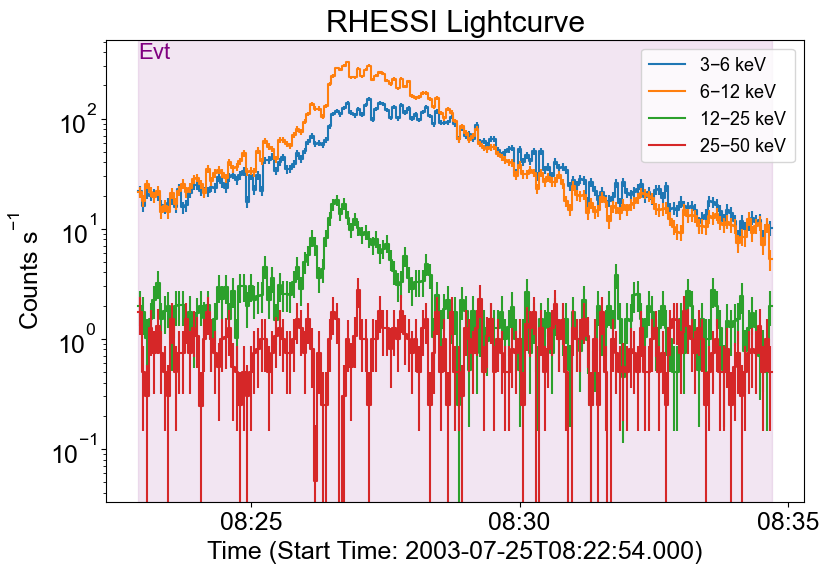

In [8]:
plt.rcParams['font.size'] = spec_font_size
plt.figure(figsize=time_profile_size)

# the line that actually plots
spec.data.loaded_spec_data['spectrum1'].lightcurve(energy_ranges=[[3,6], [6,12], [12,25],[25,50]])

plt.show()
plt.rcParams['font.size'] = default_font_size

In [9]:
# # background time. Both need to be set, if one is None (default) then no background will be calculated or will be removed
# spec.data.loaded_spec_data['spectrum1'].start_background_time = btims[id].isot[0]
# spec.data.loaded_spec_data['spectrum1'].end_background_time = btims[id].isot[1]

# # event time
# spec.data.loaded_spec_data['spectrum1'].start_event_time = ftims[id].isot[0]
# spec.data.loaded_spec_data['spectrum1'].end_event_time = ftims[id].isot[1]

# # plot again
# plt.rcParams['font.size'] = spec_font_size
# plt.figure(figsize=time_profile_size)
# spec.data.loaded_spec_data['spectrum1'].lightcurve(energy_ranges=[[3,6], [6,12], [12,25],[25,50]])
# plt.show()
# plt.rcParams['font.size'] = default_font_size

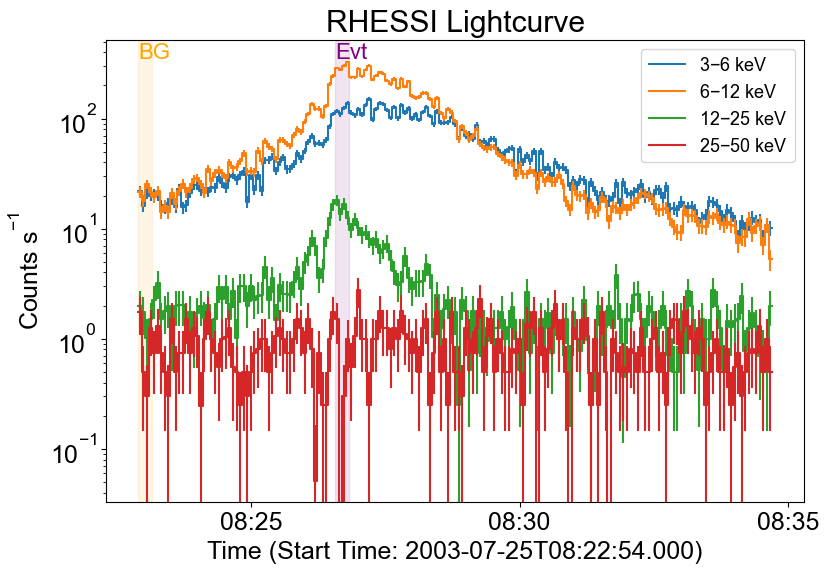

In [10]:
# background time. Both need to be set, if one is None (default) then no background will be calculated or will be removed
spec.data.loaded_spec_data['spectrum1'].start_background_time = btims[id].isot[0][:19]
spec.data.loaded_spec_data['spectrum1'].end_background_time = btims[id].isot[1][:19]

# event time
spec.data.loaded_spec_data['spectrum1'].start_event_time = ftims[id].isot[0][:19]
spec.data.loaded_spec_data['spectrum1'].end_event_time = ftims[id].isot[1][:19]

# plot again
plt.rcParams['font.size'] = spec_font_size
plt.figure(figsize=time_profile_size)
spec.data.loaded_spec_data['spectrum1'].lightcurve(energy_ranges=[[3,6], [6,12], [12,25],[25,50]])
plt.show()
plt.rcParams['font.size'] = default_font_size

In [11]:
spec.model = "f_vth+thick_fn"
spec.loglikelihood = "cstat"
# spec.loglikelihood = "poisson" # This shouldn't be used with RHESSI data....
spec.show_params

Param,Status,Value,Bounds,Error
,,,"(min, max)","(-, +)"
str22,str11,float64,object,object
T1_spectrum1,free,1.00e+00,"(0.0, None)","( 0.00e+00, 0.00e+00)"
EM1_spectrum1,free,1.00e+00,"(0.0, None)","( 0.00e+00, 0.00e+00)"
total_eflux1_spectrum1,free,1.00e+00,"(0.0, None)","( 0.00e+00, 0.00e+00)"
index1_spectrum1,free,1.00e+00,"(0.0, None)","( 0.00e+00, 0.00e+00)"
e_c1_spectrum1,free,1.00e+00,"(0.0, None)","( 0.00e+00, 0.00e+00)"
Fit Stat.,cstat ln(L),0.00e+00,--,--


In [12]:
# Just fit thermal part first and set the bounds
spec.energy_fitting_range = [4,8]
spec.params["T1_spectrum1"] = {"Value":10, "Bounds":(7, 20)}
spec.params["EM1_spectrum1"] = {"Value":1, "Bounds":(1e-2, 1e2)}
spec.params["total_eflux1_spectrum1"] = {"Status":"fix", "Value":0.9, "Bounds":(1e-2, 1e2)}
spec.params["index1_spectrum1"] = {"Status":"fix", "Value":6, "Bounds":(3, 12)}
spec.params["e_c1_spectrum1"] = {"Status":"fix", "Value":15, "Bounds":(7, 30)}
spec_fit = spec.fit()

# Then non-thermal fit higher energy
spec.energy_fitting_range = [8,15]
spec.params["T1_spectrum1"] = "fix"
spec.params["EM1_spectrum1"] = "fix"
spec.params["total_eflux1_spectrum1"] = "free"
spec.params["index1_spectrum1"] = "free"
spec.params["e_c1_spectrum1"] = "free"
spec_fit = spec.fit()

# The do the full range
spec.energy_fitting_range = [4,15]
spec.params["T1_spectrum1"] = "free"
spec.params["EM1_spectrum1"] = "free"
spec.params["total_eflux1_spectrum1"] = "free"
spec.params["index1_spectrum1"] = "free"
spec.params["e_c1_spectrum1"] = "free"
spec_fit = spec.fit()


In [13]:
print(spec.params)

                       Status      Value         Bounds   
T1_spectrum1             free  18.741597        (7, 20)  \
EM1_spectrum1            free   0.352533  (0.01, 100.0)   
total_eflux1_spectrum1   free   7.222473  (0.01, 100.0)   
index1_spectrum1         free   6.369004        (3, 12)   
e_c1_spectrum1           free   7.000000        (7, 30)   

                                                               Error  
T1_spectrum1                                              (nan, nan)  
EM1_spectrum1           (0.057906713993355195, 0.057906713993355195)  
total_eflux1_spectrum1                                    (nan, nan)  
index1_spectrum1          (0.35069810791614664, 0.35069810791614664)  
e_c1_spectrum1                                            (nan, nan)  


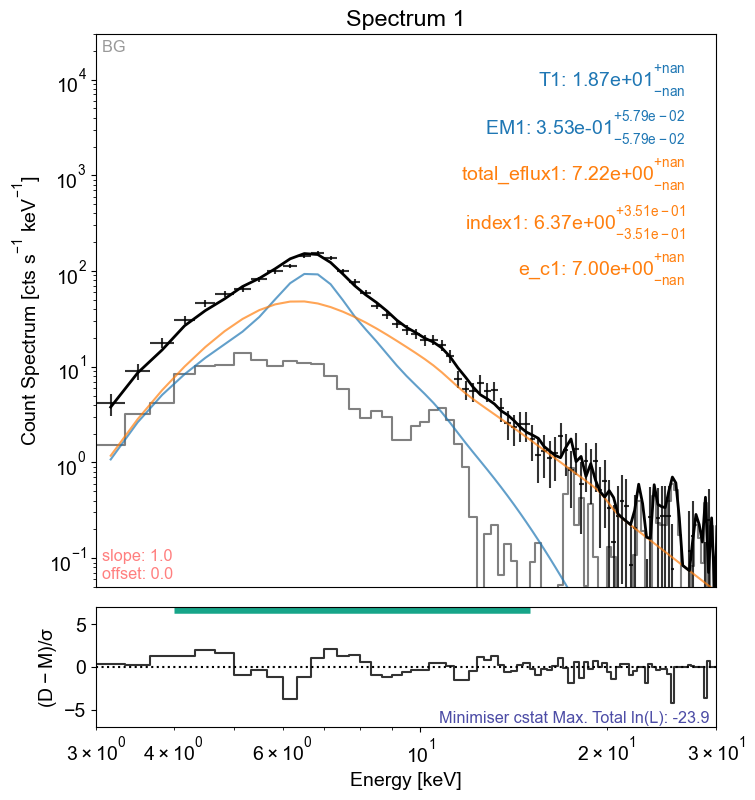

In [14]:
# Remember that sunxspex plots the background and data, 
# whereas ospex did background and data-background
# So total model black line is thermal+non-thermal+background

plt.rcParams['font.size'] = 14
plt.figure(figsize=[8,9])
axes, res_axes = spec.plot()
for a in axes:
    a.set_xlim(xlims)
    a.set_ylim(ylims)
    a.set_xscale("log")
plt.show()


In [15]:
mcmc_result = spec.run_mcmc(steps_per_walker=1000,walker_spread='mag_order')

100%|██████████| 1000/1000 [01:26<00:00, 11.55it/s]


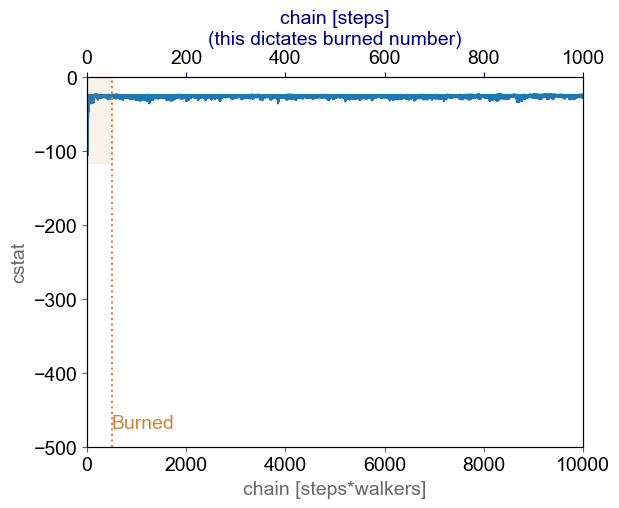

In [16]:
spec.burn_mcmc = 50
plt.figure()
spec.plot_log_prob_chain()
plt.ylim([-500,0])
plt.show()

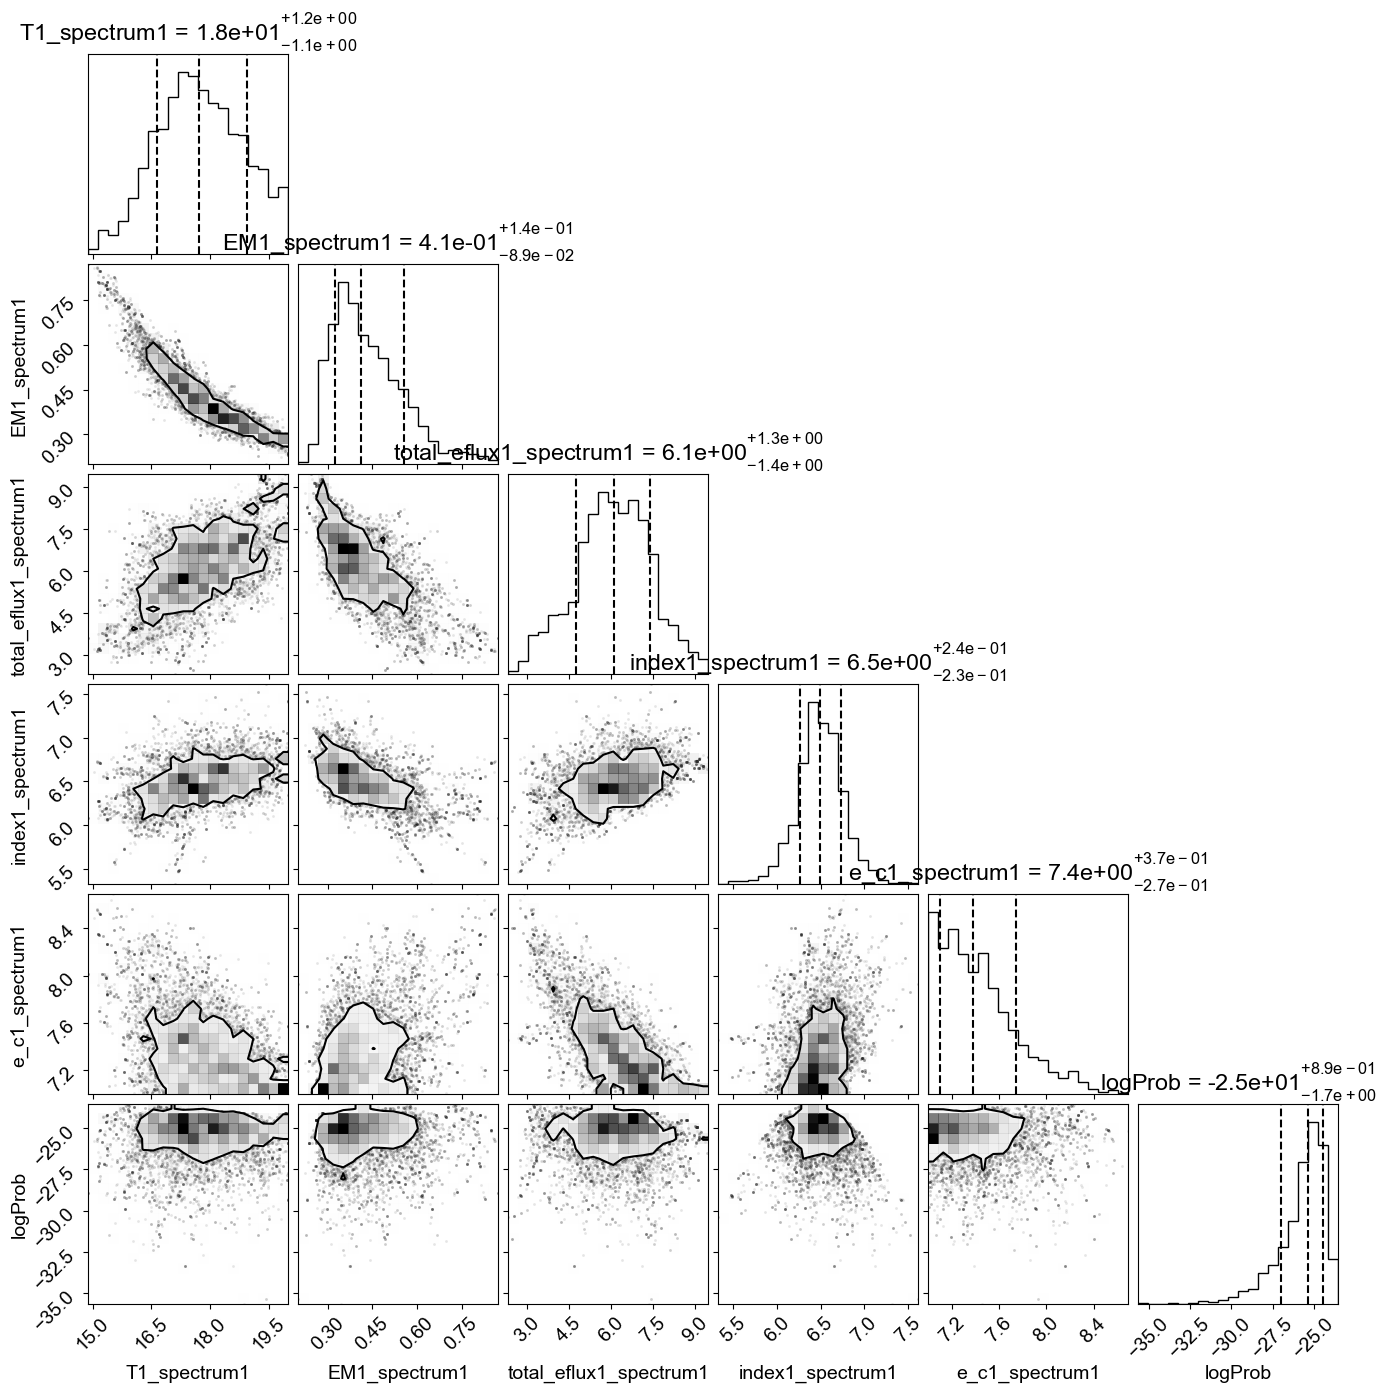

In [17]:
corner_plot = spec.corner_mcmc()

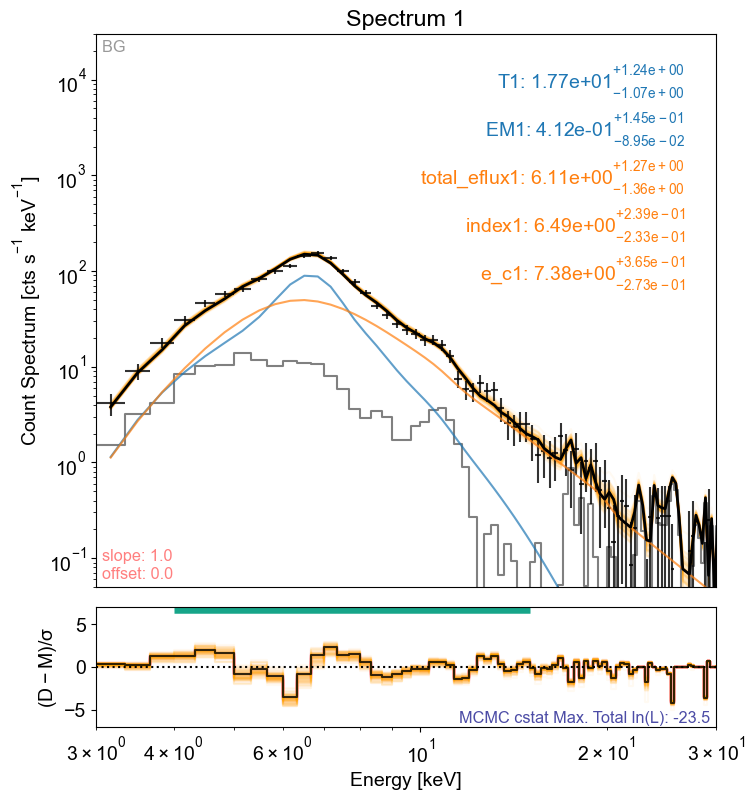

In [18]:
plt.rcParams['font.size'] = 14
plt.figure(figsize=[8,9])
axes, res_axes = spec.plot()
for a in axes:
    a.set_xlim(xlims)
    a.set_ylim(ylims)
    a.set_xscale("log")
plt.show()


In [19]:
# Note this only work in the current version of sunxspex.....
# Get all the fit parameters
tmk=spec.params["T1_spectrum1"]['Value']
tmk_ci=[tmk-spec.params["T1_spectrum1"]['Error'][0],tmk+spec.params["T1_spectrum1"]['Error'][1]]
em=spec.params["EM1_spectrum1"]['Value']*1e46
em_ci=[em-spec.params["EM1_spectrum1"]['Error'][0]*1e46,\
    em+spec.params["EM1_spectrum1"]['Error'][1]*1e46]
ntot=spec.params["total_eflux1_spectrum1"]["Value"]*1e35
ntot_err=[spec.params["total_eflux1_spectrum1"]["Error"][0]*1e35,\
          spec.params["total_eflux1_spectrum1"]["Error"][1]*1e35]
ind=spec.params["index1_spectrum1"]["Value"]
ind_err=[spec.params["index1_spectrum1"]["Error"][0],spec.params["index1_spectrum1"]["Error"][1]]
ec=spec.params["e_c1_spectrum1"]["Value"]
ec_err=[spec.params["e_c1_spectrum1"]["Error"][0],spec.params["e_c1_spectrum1"]["Error"][1]]

# Make them look nice for the plot
tmks=f'{tmk:4.2f}'
tmkups=f'{tmk_ci[1]-tmk:4.2f}'
tmkdns=f'{tmk-tmk_ci[0]:4.2f}'
ems=f'{em*1e-46:4.2f}'
emups=f'{(em_ci[1]-em)*1e-46:4.2f}'
emdns=f'{(em-em_ci[0])*1e-46:4.2f}'
nts=f'{ntot*1e-35:4.2f}'
ntups=f'{ntot_err[1]*1e-35:4.2f}'
ntdns=f'{ntot_err[0]*1e-35:4.2f}'
inds=f'{ind:4.2f}'
indups=f'{ind_err[1]:4.2f}'
inddns=f'{ind_err[0]:4.2f}'
ecs=f'{ec:4.2f}'
ecups=f'{ec_err[1]:4.2f}'
ecdns=f'{ec_err[0]:4.2f}'

# Get the data and fits to replot
engs=spec.plotting_info['spectrum1']['count_channels']
edels=spec.plotting_info['spectrum1']['count_channel_error']
rat=spec.plotting_info['spectrum1']['count_rates']
erat=spec.plotting_info['spectrum1']['count_rate_errors']
# Currently background returns same values twice ?!?!?! like resid
backrat=spec.plotting_info['spectrum1']['background_rate'][::2]
resid=spec.plotting_info['spectrum1']['residuals'][::2]
fmd=spec.plotting_info['spectrum1']['count_rate_model']
sfmd=spec.plotting_info['spectrum1']['submodels']
fiter=spec.plotting_info['spectrum1']['fitting_range']
# Sort out the energy binning steps for plotting
stepe = list()
for i in range(len(engs)):
    stepe.append(engs[i] - edels[i])
stepe.append(engs[-1]+edels[-1])
ns=len(stepe)

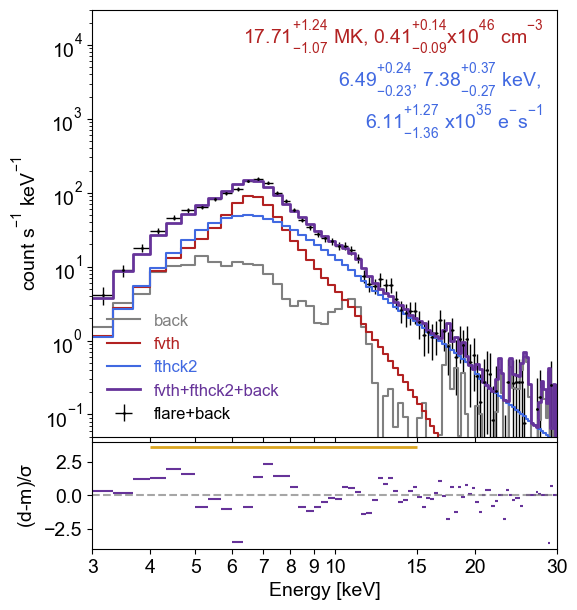

In [20]:
# Now do a nicer plot
# With x-axis log labels again
yrlim=[-4,4]
xlim=[3,22]
gs_kw = dict(height_ratios=[4,1],hspace=0.02,wspace=0.05)
fig, axs = plt.subplots(ncols=1, nrows=2, constrained_layout=False,
                             gridspec_kw=gs_kw,figsize=(6,7))

axs[0].errorbar(engs,rat,xerr=edels,yerr=erat,fmt='.',color='k',lw=1.,ms=2,label='flare+back')
axs[0].step(stepe[0:ns-1],backrat,where='post',color='grey',lw=1.5,label='back')
axs[0].step(stepe[0:ns-1],sfmd[0][0:ns-1],where='post',color='firebrick',label='fvth')
axs[0].step(stepe[0:ns-1],sfmd[1][0:ns-1],where='post',color='royalblue',label='fthck2')
axs[0].step(stepe[0:ns-1],fmd[0:ns-1],where='post',color='rebeccapurple',lw=2,label='fvth+fthck2+back')
axs[0].legend(loc=3,labelcolor='linecolor',frameon=False,prop={'size': 12})
axs[0].text(0.97,0.92,tmks+'$^{+'+tmkups+'}_{-'+tmkdns+'}$ MK, '+\
            ems+'$^{+'+emups+'}_{-'+emdns+'}$x10$^{46}$ cm$^{-3}$',\
              color='firebrick',ha='right',transform=axs[0].transAxes)

axs[0].text(0.97,0.82,inds+'$^{+'+indups+'}_{-'+inddns+'}$, '+\
            ecs+'$^{+'+ecups+'}_{-'+ecdns+'}$ keV, ',
              color='royalblue',ha='right',transform=axs[0].transAxes)
axs[0].text(0.97,0.72,nts+'$^{+'+ntups+'}_{-'+ntdns+'}$ x10$^{35}$ e$^{-}$s$^{-1}$',\
              color='royalblue',ha='right',transform=axs[0].transAxes)
axs[1].hlines(resid,stepe[0:-1],stepe[1:],color='rebeccapurple',lw=1.5)

axs[0].set_ylabel('count s$^{-1}$ keV$^{-1}$')

axs[0].set_ylabel('count s$^{-1}$ keV$^{-1}$')
axs[0].set_xlabel(" ")
axs[0].set_yscale("log")
axs[0].set_ylim(ylims)


axs[1].set_ylabel("(d-m)/$\sigma$")
axs[1].set_ylim(yrlim)
axs[1].set_xlabel("Energy [keV]")
axs[1].hlines(0.0,xlims[0],xlims[1],color='grey',linestyle="--",alpha=0.7)
axs[1].hlines(yrlim[1]*0.9,fiter[0],fiter[1],color='goldenrod',lw=2)

for aaxx in axs:
    aaxx.set_xlim(xlim)
    aaxx.set_xscale("log")
    aaxx.set_xticks([3,4,5,6,7,8,9,10,15,20,30])
    aaxx.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axs[0].set_xticklabels([])
plt.show()

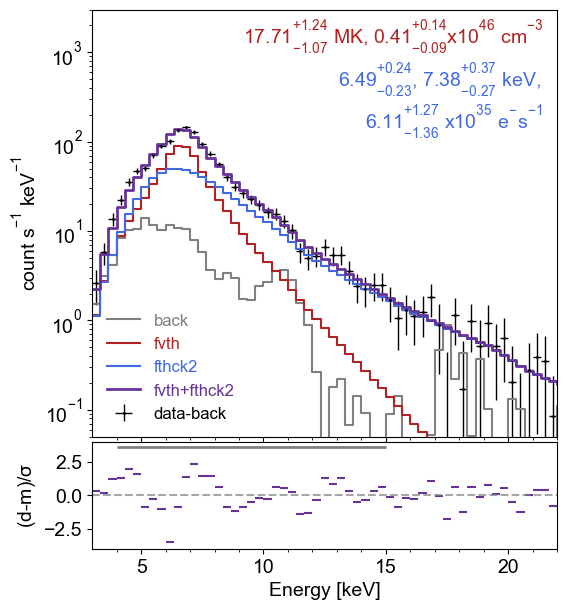

In [21]:
# Do the more standard plot of data-background
# Now do a nicer plot but just linear x-axis
yrlim=[-4,4]
ylims=[5e-2,3e3]
xlim=[3,22]
gs_kw = dict(height_ratios=[4,1],hspace=0.02,wspace=0.05)
fig, axs = plt.subplots(ncols=1, nrows=2, constrained_layout=False,
                             gridspec_kw=gs_kw,figsize=(6,7))

axs[0].errorbar(engs,rat-backrat,xerr=edels,yerr=erat,fmt='.',color='k',lw=1.,ms=2,label='data-back')
axs[0].step(stepe[0:ns-1],backrat,where='post',color='grey',lw=1.5,label='back')
axs[0].step(stepe[0:ns-1],sfmd[0][0:ns-1],where='post',color='firebrick',label='fvth')
axs[0].step(stepe[0:ns-1],sfmd[1][0:ns-1],where='post',color='royalblue',label='fthck2')
axs[0].step(stepe[0:ns-1],sfmd[0][0:ns-1]+sfmd[1][0:ns-1],where='post',color='rebeccapurple',lw=2,label='fvth+fthck2')
axs[0].legend(loc=3,labelcolor='linecolor',frameon=False,prop={'size': 12})
axs[0].text(0.97,0.92,tmks+'$^{+'+tmkups+'}_{-'+tmkdns+'}$ MK, '+\
            ems+'$^{+'+emups+'}_{-'+emdns+'}$x10$^{46}$ cm$^{-3}$',\
              color='firebrick',ha='right',transform=axs[0].transAxes)

axs[0].text(0.97,0.82,inds+'$^{+'+indups+'}_{-'+inddns+'}$, '+\
            ecs+'$^{+'+ecups+'}_{-'+ecdns+'}$ keV, ',
              color='royalblue',ha='right',transform=axs[0].transAxes)
axs[0].text(0.97,0.72,nts+'$^{+'+ntups+'}_{-'+ntdns+'}$ x10$^{35}$ e$^{-}$s$^{-1}$',\
              color='royalblue',ha='right',transform=axs[0].transAxes)
axs[1].hlines(resid,stepe[0:-1],stepe[1:],color='rebeccapurple',lw=1.5)

axs[0].set_ylabel('count s$^{-1}$ keV$^{-1}$')

axs[0].set_yscale("log")
# axs[0].set_xscale("log")
axs[0].set_ylim(ylims)
axs[0].set_xlim(xlim)
axs[0].set_xlabel(" ")
axs[0].set_xticklabels([])
axs[0].xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(5))

axs[1].set_ylabel("(d-m)/$\sigma$")
axs[1].set_ylim(yrlim)
axs[1].set_xlim(xlim)
# axs[1].set_xscale("log")
axs[1].set_xlabel("Energy [keV]")
axs[1].xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(5))
axs[1].hlines(0.0,xlims[0],xlims[1],color='grey',linestyle="--",alpha=0.7)
axs[1].hlines(yrlim[1]*0.9,fiter[0],fiter[1],color='grey',lw=2)
# plt.savefig('nice_plot.pdf',bbox_inches='tight')
plt.show()

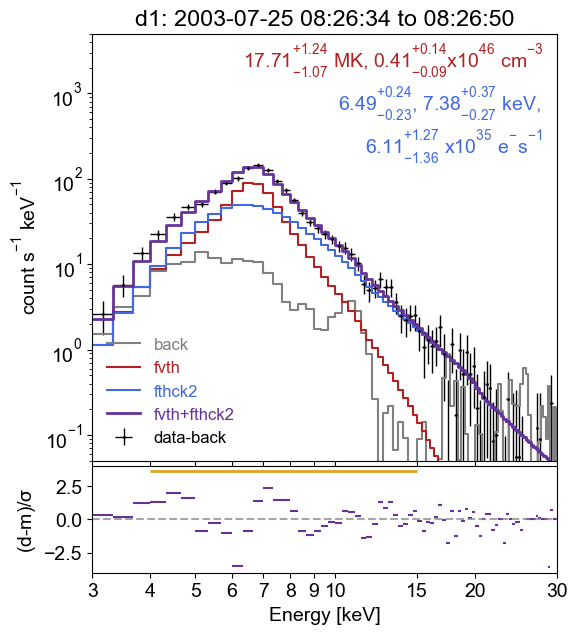

In [22]:
# Do the more standard plot of data-background
# Now do a nicer plot with x-axis log labels again
yrlim=[-4,4]
ylims=[5e-2,5e3]
xlim=[3,30]
gs_kw = dict(height_ratios=[4,1],hspace=0.02,wspace=0.05)
fig, axs = plt.subplots(ncols=1, nrows=2, constrained_layout=False,
                             gridspec_kw=gs_kw,figsize=(6,7))

axs[0].errorbar(engs,rat-backrat,xerr=edels,yerr=erat,fmt='.',color='k',lw=1.,ms=2,label='data-back')
axs[0].step(stepe[0:ns-1],backrat,where='post',color='grey',lw=1.5,label='back')
axs[0].step(stepe[0:ns-1],sfmd[0][0:ns-1],where='post',color='firebrick',label='fvth')
axs[0].step(stepe[0:ns-1],sfmd[1][0:ns-1],where='post',color='royalblue',label='fthck2')
axs[0].step(stepe[0:ns-1],sfmd[0][0:ns-1]+sfmd[1][0:ns-1],where='post',color='rebeccapurple',lw=2,label='fvth+fthck2')
axs[0].legend(loc=3,labelcolor='linecolor',frameon=False,prop={'size': 12})
axs[0].text(0.97,0.92,tmks+'$^{+'+tmkups+'}_{-'+tmkdns+'}$ MK, '+\
            ems+'$^{+'+emups+'}_{-'+emdns+'}$x10$^{46}$ cm$^{-3}$',\
              color='firebrick',ha='right',transform=axs[0].transAxes)

axs[0].text(0.97,0.82,inds+'$^{+'+indups+'}_{-'+inddns+'}$, '+\
            ecs+'$^{+'+ecups+'}_{-'+ecdns+'}$ keV, ',
              color='royalblue',ha='right',transform=axs[0].transAxes)
axs[0].text(0.97,0.72,nts+'$^{+'+ntups+'}_{-'+ntdns+'}$ x10$^{35}$ e$^{-}$s$^{-1}$',\
              color='royalblue',ha='right',transform=axs[0].transAxes)
axs[1].hlines(resid,stepe[0:-1],stepe[1:],color='rebeccapurple',lw=1.5)

axs[0].set_ylabel('count s$^{-1}$ keV$^{-1}$')
axs[0].set_xlabel(" ")
axs[0].set_yscale("log")
axs[0].set_ylim(ylims)
axs[0].set_title(dname+': '+ftims[id].iso[0][:-4]+' to '+ftims[id].iso[1][11:-4])


axs[1].set_ylabel("(d-m)/$\sigma$")
axs[1].set_ylim(yrlim)
axs[1].set_xlabel("Energy [keV]")
axs[1].hlines(0.0,xlims[0],xlims[1],color='grey',linestyle="--",alpha=0.7)
axs[1].hlines(yrlim[1]*0.9,fiter[0],fiter[1],color='goldenrod',lw=2)

for aaxx in axs:
    aaxx.set_xlim(xlim)
    aaxx.set_xscale("log")
    aaxx.set_xticks([3,4,5,6,7,8,9,10,15,20,30])
    aaxx.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axs[0].set_xticklabels([])
# plt.savefig('nice_plot.pdf',bbox_inches='tight')
plt.show()